# Red Wine Quality Prediction


#### Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

#### Attribute Information

###### Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
###### Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

##### Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!



In [182]:
# Importing the important libraries in python.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from collections import Counter
from scipy import stats
from scipy.stats  import norm, boxcox
# warning library
import warnings
warnings.filterwarnings("ignore")

from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [183]:
# importing the dataset in datafame
winedata = pd.read_csv('winequality-red.csv')
winedata.head(159)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
154,7.1,0.43,0.42,5.5,0.070,29.0,129.0,0.9973,3.42,0.72,10.5,5
155,7.1,0.43,0.42,5.5,0.071,28.0,128.0,0.9973,3.42,0.71,10.5,5
156,7.1,0.43,0.42,5.5,0.070,29.0,129.0,0.9973,3.42,0.72,10.5,5
157,7.1,0.43,0.42,5.5,0.071,28.0,128.0,0.9973,3.42,0.71,10.5,5


In [184]:
winedata.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [185]:
print("Do we have data with null in columns?")
winedata.columns[winedata.isnull().any()]

Do we have data with null in columns?


Index([], dtype='object')

In [186]:
winedata.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [187]:
winedata.shape

(1599, 12)

In [188]:
winedata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [189]:
winedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Data Visulization and Checking Skewness

##### Volatile Acidity 

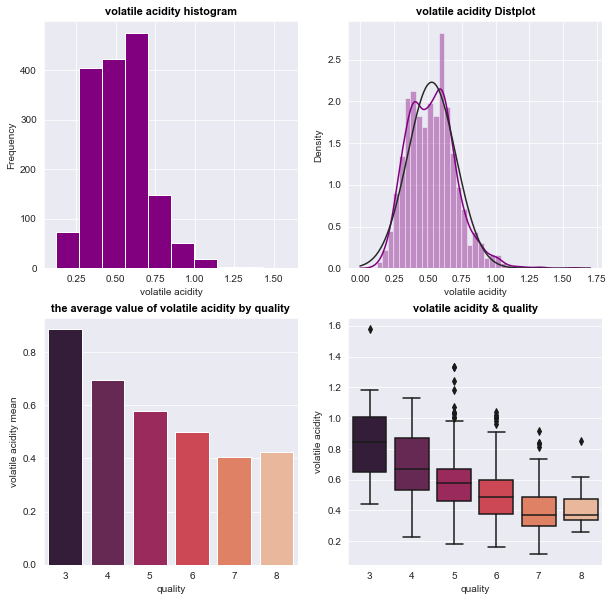

In [190]:
# Visuliazation for the Volatile Acidity
quality = [3,4,5,6,7,8]
from scipy.stats import norm
volatileAcidityMean = []

for each in quality:
    x = winedata[winedata["quality"] == each]
    mean = x["volatile acidity"].mean()
    volatileAcidityMean.append(mean)


plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.hist(winedata["volatile acidity"], color="purple")
plt.xlabel("volatile acidity")
plt.ylabel("Frequency")
plt.title("volatile acidity histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(winedata["volatile acidity"], fit=norm, color="purple")
plt.title("volatile acidity Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = volatileAcidityMean, palette= "rocket")
plt.title("the average value of volatile acidity by quality", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("volatile acidity mean")
plt.subplot(2,2,4)
sns.boxplot(winedata['quality'], winedata["volatile acidity"], palette='rocket')
plt.title("volatile acidity & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()


Reducement in Volatile Acidity seems affect the positivity
As from the Second Graph we can see that the distribution is good

###### Fixed Acidity

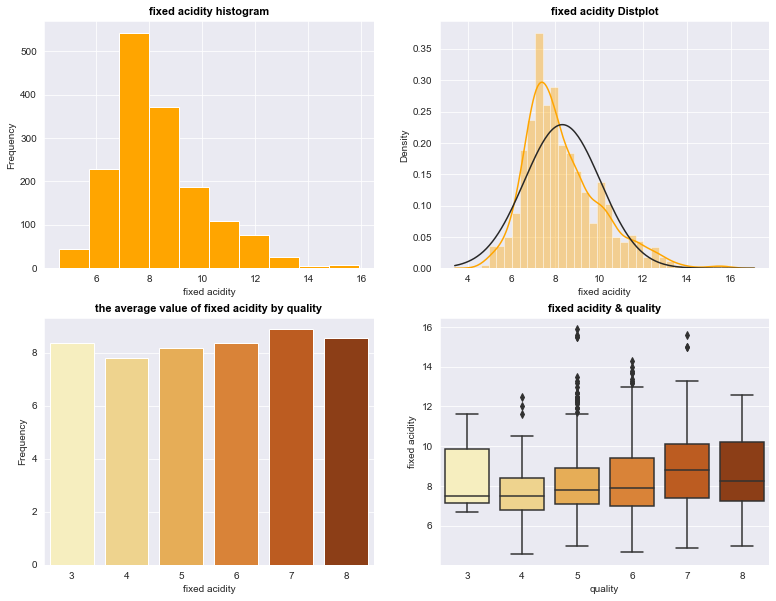

In [191]:
quality = [3,4,5,6,7,8]
fixedAcidityMean = []

for each in quality:
    x = winedata[winedata["quality"] == each]
    mean = x["fixed acidity"].mean()
    fixedAcidityMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(winedata["fixed acidity"], color="orange")
plt.xlabel("fixed acidity")
plt.ylabel("Frequency")
plt.title("fixed acidity histogram", color = "black", fontweight='bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(winedata["fixed acidity"], fit=norm, color="orange")
plt.title("fixed acidity Distplot", color = "black", fontweight='bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = fixedAcidityMean, palette="YlOrBr")
plt.title("the average value of fixed acidity by quality", color = "black", fontweight='bold', fontsize = 11)
plt.xlabel("fixed acidity")
plt.ylabel("Frequency")
plt.subplot(2,2,4)
sns.boxplot(winedata['quality'], winedata["fixed acidity"], palette='YlOrBr')
plt.title("fixed acidity & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

 --> from the 2nd graph the skewness is shift to right.     --> Fixed Acidity does not affect the data

#### Ctric Acid 

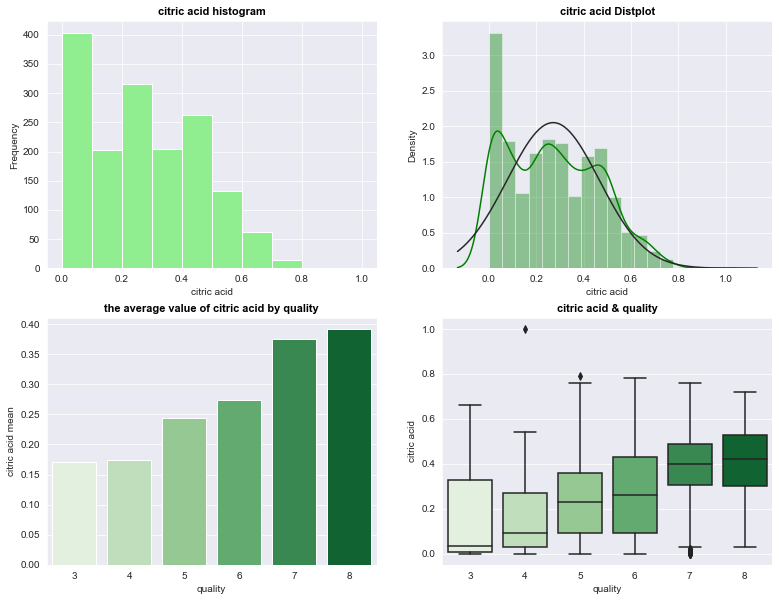

In [192]:
quality = [3,4,5,6,7,8]
citricAcidMean = []

for each in quality:
    x = winedata[winedata["quality"] == each]
    mean = x["citric acid"].mean()
    citricAcidMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(winedata["citric acid"], color="lightgreen")
plt.xlabel("citric acid")
plt.ylabel("Frequency")
plt.title("citric acid histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(winedata["citric acid"], fit=norm, color="green")
plt.title("citric acid Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = citricAcidMean, palette= "Greens")
plt.title("the average value of citric acid by quality", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("citric acid mean")
plt.subplot(2,2,4)
sns.boxplot(winedata['quality'], winedata["citric acid"], palette='Greens')
plt.title("citric acid & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

Increase in citric acid affects positively.

#### Residual Suger.

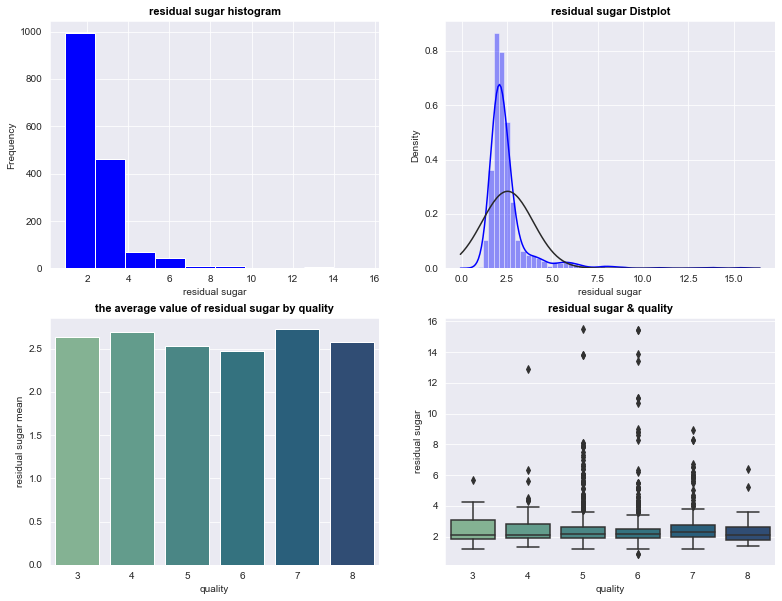

In [193]:
quality = [3,4,5,6,7,8]
residualSugarMean = []

for each in quality:
    x = winedata[winedata["quality"] == each]
    mean = x["residual sugar"].mean()
    residualSugarMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(winedata["residual sugar"], color="blue")
plt.xlabel("residual sugar")
plt.ylabel("Frequency")
plt.title("residual sugar histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(winedata["residual sugar"], fit=norm, color="blue")
plt.title("residual sugar Distplot", color = "black", fontweight= 'bold', fontsize = 11)

plt.subplot(2,2,3)
sns.barplot(x = quality, y = residualSugarMean, palette= "crest")
plt.title("the average value of residual sugar by quality", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("residual sugar mean")
plt.subplot(2,2,4)
sns.boxplot(winedata['quality'], winedata["residual sugar"], palette='crest')
plt.title("residual sugar & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()


There is skewness on right side according to the normal distribution we need to fix this  

#### Chlorides

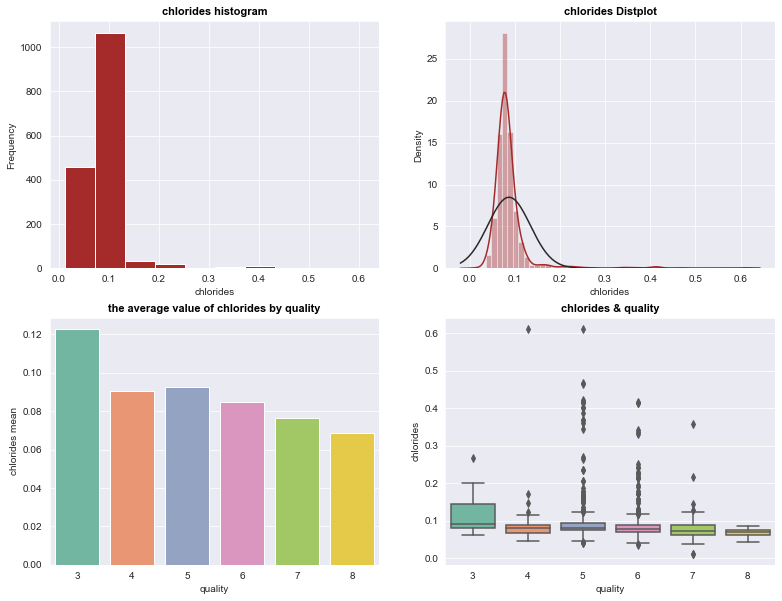

In [194]:
quality = [3,4,5,6,7,8]
chloridesMean = []

for each in quality:
    x = winedata[winedata["quality"] == each]
    mean = x["chlorides"].mean()
    chloridesMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(winedata["chlorides"], color="brown")
plt.xlabel("chlorides")
plt.ylabel("Frequency")
plt.title("chlorides histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(winedata["chlorides"], fit=norm, color="brown")
plt.title("chlorides Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = chloridesMean, palette= "Set2")
plt.title("the average value of chlorides by quality", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("chlorides mean")
plt.subplot(2,2,4)
sns.boxplot(winedata['quality'], winedata["chlorides"], palette='Set2')
plt.title("chlorides & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()


There are too many outliers in the fourth graph we have to remove the outliers so that it affect the models in a negative way.

#### Free Sulferdioxide

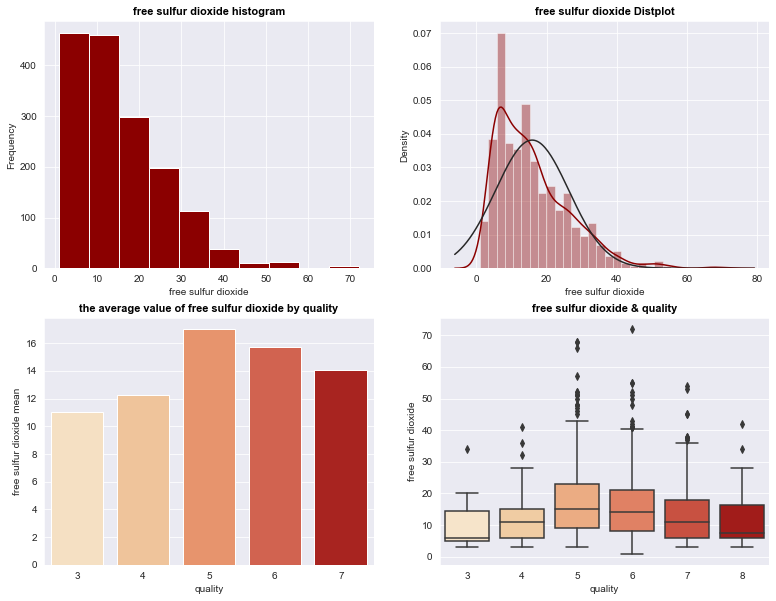

In [195]:

quality = [3,4,5,6,7]
freeSulfurDioxideMean = []

for each in quality:
    x = winedata[winedata["quality"] == each]
    mean = x["free sulfur dioxide"].mean()
    freeSulfurDioxideMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(winedata["free sulfur dioxide"], color="darkred")
plt.xlabel("free sulfur dioxide")
plt.ylabel("Frequency")
plt.title("free sulfur dioxide histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(winedata["free sulfur dioxide"], fit=norm, color="darkred")
plt.title("free sulfur dioxide Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = freeSulfurDioxideMean, palette= "OrRd")
plt.title("the average value of free sulfur dioxide by quality", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("free sulfur dioxide mean")
plt.subplot(2,2,4)
sns.boxplot(winedata['quality'], winedata["free sulfur dioxide"], palette='OrRd')
plt.title("free sulfur dioxide & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()


Ther is teh right skewness in he 2nd graph and so many outliers in the 4th graph which can affect the aqurracy of our upcomming models.


#### Total Sulfer Dioxde 

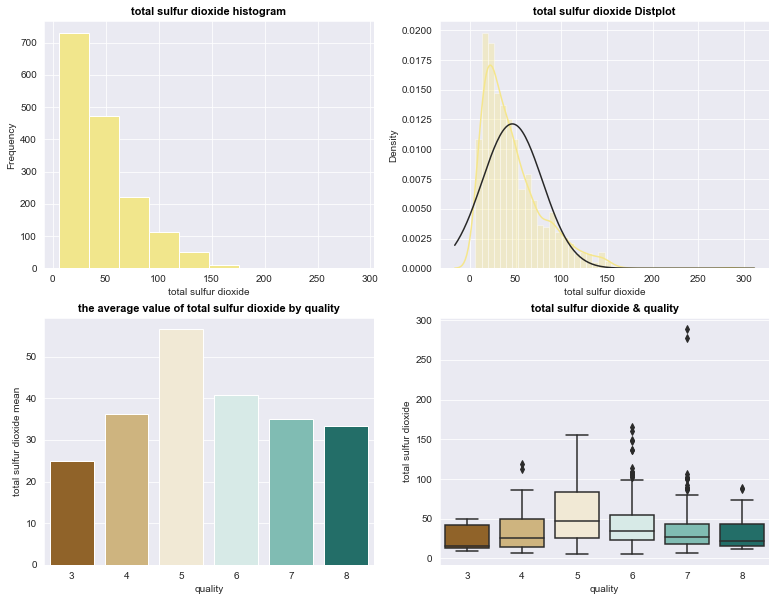

In [196]:
quality = [3,4,5,6,7,8]

totalSulfurDioxideMean = []

for each in quality:
    x = winedata[winedata["quality"] == each]
    mean = x["total sulfur dioxide"].mean()
    totalSulfurDioxideMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(winedata["total sulfur dioxide"], color="#F1E68C")
plt.xlabel("total sulfur dioxide")
plt.ylabel("Frequency")
plt.title("total sulfur dioxide histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(winedata["total sulfur dioxide"], fit=norm, color="#F5E68C")
plt.title("total sulfur dioxide Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = totalSulfurDioxideMean, palette= "BrBG")
plt.title("the average value of total sulfur dioxide by quality", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("total sulfur dioxide mean")
plt.subplot(2,2,4)
sns.boxplot(winedata['quality'], winedata["total sulfur dioxide"], palette='BrBG')
plt.title("total sulfur dioxide & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

In the total sulfer dioxide observation 2nd graph shows the right skewness and 4th graph show some outliers which may liffele affect to our models 

#### Density

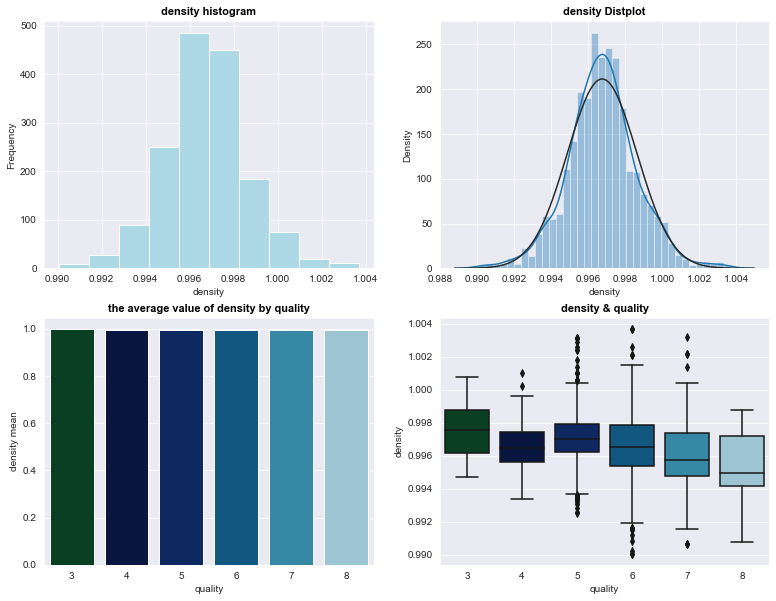

In [197]:
quality = [3,4,5,6,7,8]
densityMean = []

for each in quality:
    x = winedata[winedata["quality"] == each]
    mean = x["density"].mean()
    densityMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(winedata["density"], color="lightblue")
plt.xlabel("density")
plt.ylabel("Frequency")
plt.title("density histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(winedata["density"], fit=norm)
plt.title("density Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = densityMean, palette= "ocean")
plt.title("the average value of density by quality", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("density mean")
plt.subplot(2,2,4)
sns.boxplot(winedata['quality'], winedata["density"], palette='ocean')
plt.title("density & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()


The density has shown the equal skewness accorddding to the normal distribution and lot of outliers in the 4th graph which we needed to fixed it.


#### pH

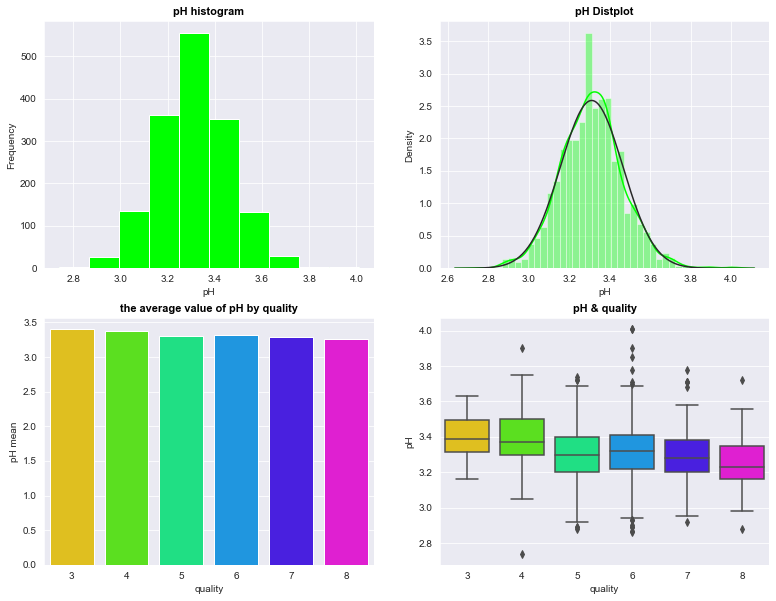

In [198]:

quality= [3,4,5,6,7,8]
pHMean = []

for each in quality:
    x = winedata[winedata["quality"] == each]
    mean = x["pH"].mean()
    pHMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(winedata["pH"], color="#00FF00")
plt.xlabel("pH")
plt.ylabel("Frequency")
plt.title("pH histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(winedata["pH"], fit=norm, color = "#00FF00")
plt.title("pH Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = pHMean, palette= "hsv")
plt.title("the average value of pH by quality", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("pH mean")
plt.subplot(2,2,4)
sns.boxplot(winedata['quality'], winedata["pH"], palette='hsv')
plt.title("pH & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

As we there are just the outliers in the 4th graph hence we need to fix it.


#### Sulphate

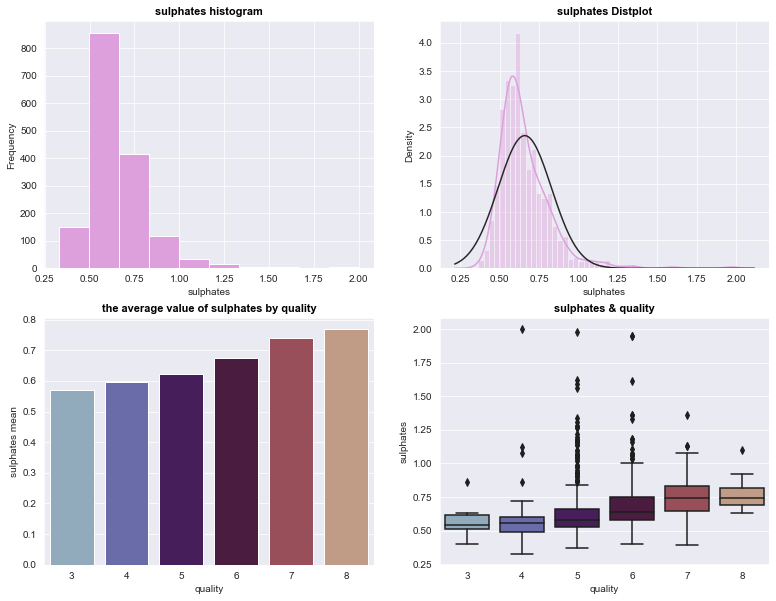

In [199]:

quality = [3,4,5,6,7,8]
sulphatesMean = []

for each in quality:
    x = winedata[winedata["quality"] == each]
    mean = x["sulphates"].mean()
    sulphatesMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(winedata["sulphates"], color="plum")
plt.xlabel("sulphates")
plt.ylabel("Frequency")
plt.title("sulphates histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(winedata["sulphates"], fit=norm, color="plum")
plt.title("sulphates Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = sulphatesMean, palette= "twilight")
plt.title("the average value of sulphates by quality", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("sulphates mean")
plt.subplot(2,2,4)
sns.boxplot(winedata['quality'], winedata["sulphates"], palette='twilight')
plt.title("sulphates & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()


As we see there is right skewness and outliers in the distribution the graphs.



#### Alchol

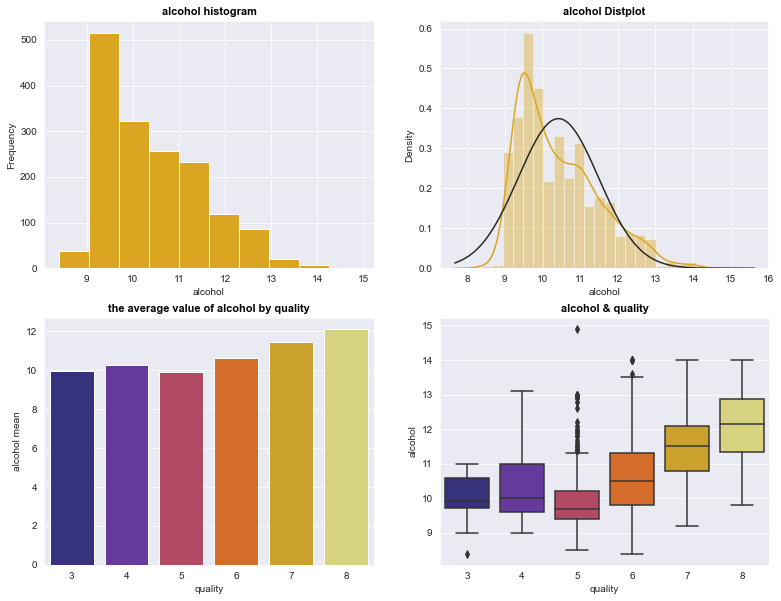

In [200]:
quality = [3,4,5,6,7,8]
alcoholMean = []

for each in quality:
    x = winedata[winedata["quality"] == each]
    mean = x["alcohol"].mean()
    alcoholMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(winedata["alcohol"], color="#DAA520")
plt.xlabel("alcohol")
plt.ylabel("Frequency")
plt.title("alcohol histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(winedata["alcohol"], fit=norm, color="#DAA520")
plt.title("alcohol Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = alcoholMean, palette= "CMRmap")
plt.title("the average value of alcohol by quality", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("alcohol mean")
plt.subplot(2,2,4)
sns.boxplot(winedata['quality'], winedata["alcohol"], palette='CMRmap')
plt.title("alcohol & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

We need to fix the skewness and some outliers here as well

#### Quality 

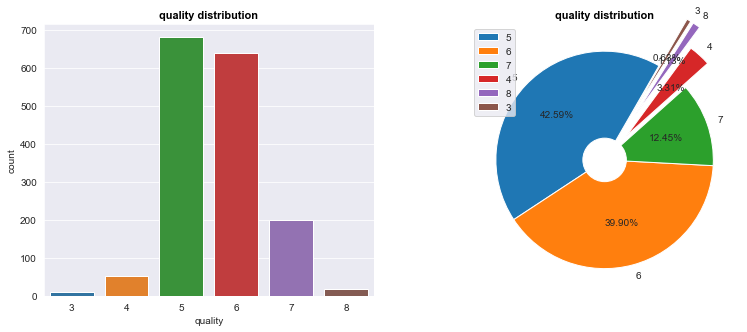

In [201]:
Number = winedata.quality.value_counts().values
Label = winedata.quality.value_counts().index
circle = plt.Circle((0,0),0.2,color = "white")
explodeTuple = (0.0, 0.0, 0.0, 0.3, 0.5, 0.5)

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.countplot(winedata["quality"])
plt.xlabel("quality")
plt.title("quality distribution", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(1,2,2)
plt.pie(Number, labels = Label,autopct='%1.2f%%', explode=explodeTuple,startangle=60)
p = plt.gcf()
p.gca().add_artist(circle) 
plt.title("quality distribution", color = "black", fontweight= 'bold', fontsize = 11)
plt.legend()


plt.show()


As we come to the last part of the distribution the vote % from  3 to 8 is shown in the graph and pie chart

#### Skewness Correction 

In the skewness correction we have to fix the features of our data of:

fixed acidity,
residual sugar,
free sulfer dioxide,
total sulfer dioxide,
sulphate

##### fixed acidity

In [202]:
(mu, sigma) = norm.fit(winedata["fixed acidity"])
print("mu {} : {}, sigma {} : {}".format("fixed acidity", mu, "fixed acidity", sigma))

mu fixed acidity : 8.31963727329581, sigma fixed acidity : 1.7405518001102729


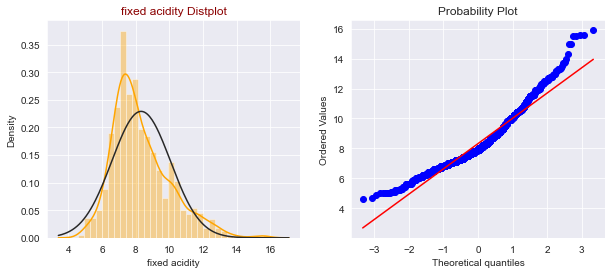

In [203]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(winedata["fixed acidity"], fit=norm, color="orange")
plt.title("fixed acidity Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(winedata["fixed acidity"], plot = plt)
plt.show()

In [204]:
winedata["fixed acidity"], lam_fixed_acidity = boxcox(winedata["fixed acidity"])

Eliminating the skewness using the boxcox method 

In [205]:
(mu, sigma) = norm.fit(winedata["fixed acidity"])
print("mu {} : {}, sigma {} : {}".format("fixed acidity", mu, "fixed acidity", sigma))

mu fixed acidity : 1.124655731469057, sigma fixed acidity : 0.048378082803535


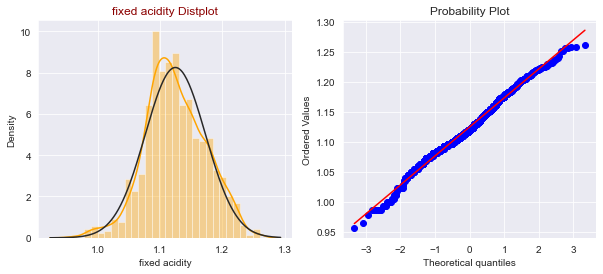

In [206]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(winedata["fixed acidity"], fit=norm, color="orange")
plt.title("fixed acidity Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(winedata["fixed acidity"], plot = plt)
plt.show()

Skewness is eliminated to a good level.

#### Residual Suger 

In [207]:
(mu, sigma) = norm.fit(winedata["residual sugar"])
print("mu {} : {}, sigma {} : {}".format("residual sugar", mu, "residual sugar", sigma))

mu residual sugar : 2.53880550343965, sigma residual sugar : 1.4094871124880495


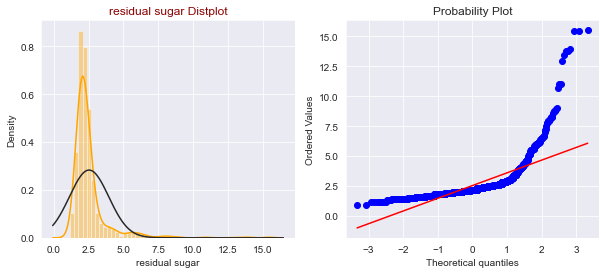

In [208]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(winedata["residual sugar"], fit=norm, color="orange")
plt.title("residual sugar Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(winedata["residual sugar"], plot = plt)
plt.show()

In [209]:
winedata["residual sugar"], lam_fixed_acidity = boxcox(winedata["residual sugar"])


In [210]:
(mu, sigma) = norm.fit(winedata["residual sugar"])
print("mu {} : {}, sigma {} : {}".format("residual sugar", mu, "residual sugar", sigma))

mu residual sugar : 0.5135558435839319, sigma residual sugar : 0.11004598444169933


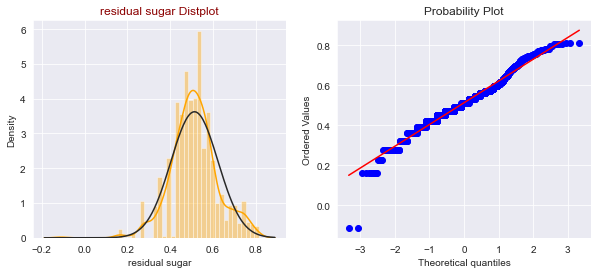

In [211]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(winedata["residual sugar"], fit=norm, color="orange")
plt.title("residual sugar Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(winedata["residual sugar"], plot = plt)
plt.show()

#### Free Sulfer Dioxide

In [212]:
(mu, sigma) = norm.fit(winedata["free sulfur dioxide"])
print("mu {} : {}, sigma {} : {}".format("free sulfur dioxide", mu, "free sulfur dioxide", sigma))

mu free sulfur dioxide : 15.874921826141339, sigma free sulfur dioxide : 10.45688561493072


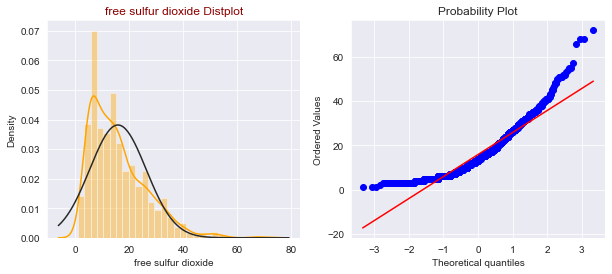

In [213]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(winedata["free sulfur dioxide"], fit=norm, color="orange")
plt.title("free sulfur dioxide Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(winedata["free sulfur dioxide"], plot = plt)
plt.show()


In [214]:
winedata["free sulfur dioxide"], lam_fixed_acidity = boxcox(winedata["free sulfur dioxide"])

In [215]:
(mu, sigma) = norm.fit(winedata["free sulfur dioxide"])
print("mu {} : {}, sigma {} : {}".format("free sulfur dioxide", mu, "free sulfur dioxide", sigma))

mu free sulfur dioxide : 3.1290485296425143, sigma free sulfur dioxide : 0.9855086968773705


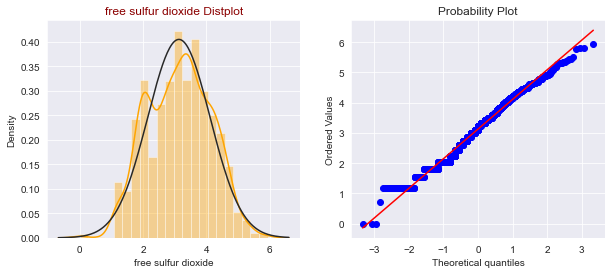

In [216]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(winedata["free sulfur dioxide"], fit=norm, color="orange")
plt.title("free sulfur dioxide Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(winedata["free sulfur dioxide"], plot = plt)
plt.show()

 Skewness removed

#### Total Sulfer Dioxide

In [217]:
(mu, sigma) = norm.fit(winedata["total sulfur dioxide"])
print("mu {} : {}, sigma {} : {}".format("total sulfur dioxide", mu, "total sulfur dioxide", sigma))

mu total sulfur dioxide : 46.46779237023139, sigma total sulfur dioxide : 32.88503665178374


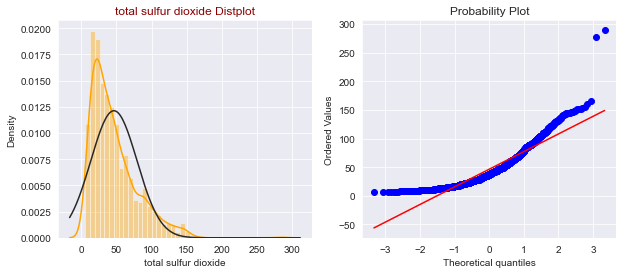

In [218]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(winedata["total sulfur dioxide"], fit=norm, color="orange")
plt.title("total sulfur dioxide Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(winedata["total sulfur dioxide"], plot = plt)
plt.show()


In [219]:
winedata["total sulfur dioxide"], lam_fixed_acidity = boxcox(winedata["total sulfur dioxide"])

In [220]:
(mu, sigma) = norm.fit(winedata["total sulfur dioxide"])
print("mu {} : {}, sigma {} : {}".format("total sulfur dioxide", mu, "total sulfur dioxide", sigma))

mu total sulfur dioxide : 3.9657192644535324, sigma total sulfur dioxide : 0.8459104716754929


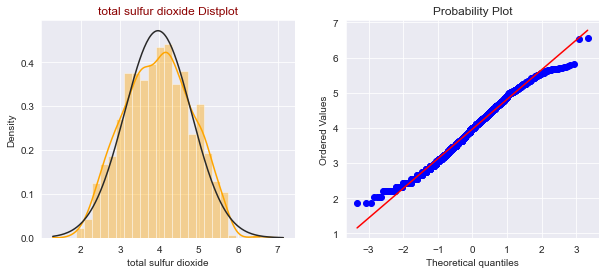

In [221]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(winedata["total sulfur dioxide"], fit=norm, color="orange")
plt.title("total sulfur dioxide Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(winedata["total sulfur dioxide"], plot = plt)
plt.show()

Skewness removed

#### Alcohol

In [222]:
(mu, sigma) = norm.fit(winedata["alcohol"])
print("mu {} : {}, sigma {} : {}".format("alcohol", mu, "alcohol", sigma))

mu alcohol : 10.422983114446529, sigma alcohol : 1.0653343003437483


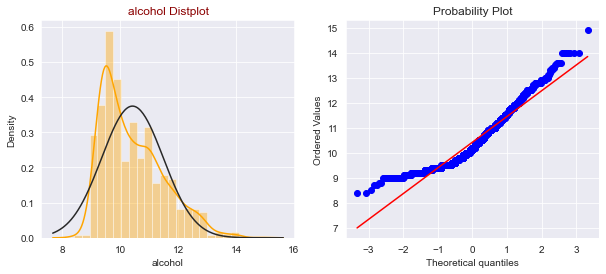

In [223]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(winedata["alcohol"], fit=norm, color="orange")
plt.title("alcohol Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(winedata["alcohol"], plot = plt)
plt.show()

In [224]:
winedata["alcohol"], lam_fixed_acidity = boxcox(winedata["alcohol"])

In [225]:
(mu, sigma) = norm.fit(winedata["alcohol"])
print("mu {} : {}, sigma {} : {}".format("alcohol", mu, "alcohol", sigma))

mu alcohol : 0.3005237243397624, sigma alcohol : 3.922651387741175e-05


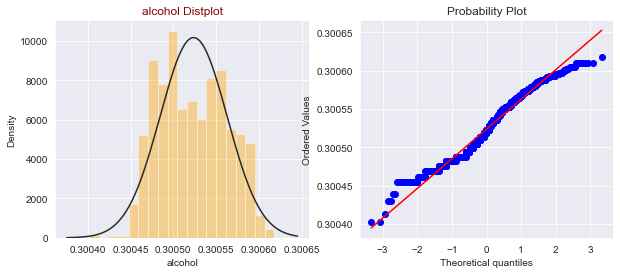

In [226]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(winedata["alcohol"], fit=norm, color="orange")
plt.title("alcohol Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(winedata["alcohol"], plot = plt)
plt.show()


### Outlier Detection 

as we have detected some outliers in our data we have to extract it from the data

In [227]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3st quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces 
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1.5) 
    
    return multiple_outliers

In [228]:
print("number of outliers detected --> ",len(winedata.loc[detect_outliers(winedata,winedata.columns[:-1])]))
winedata.loc[detect_outliers(winedata,winedata.columns[:-1])]

number of outliers detected -->  68


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
45,0.956497,0.520,0.15,0.494302,0.054,2.427186,4.649352,0.99340,3.90,0.56,0.300598,4
94,0.985731,1.020,0.04,0.277689,0.045,4.920668,4.983161,0.99380,3.75,0.48,0.300535,4
95,0.964194,0.600,0.17,0.530233,0.058,3.504207,5.261323,0.99320,3.85,0.60,0.300595,6
442,1.257350,0.685,0.76,0.666360,0.100,2.046206,4.144017,1.00320,2.95,0.68,0.300559,7
553,0.985731,1.040,0.24,0.360736,0.050,4.503448,5.136097,0.99340,3.74,0.62,0.300567,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1319,1.153967,0.760,0.68,0.394331,0.414,3.590783,4.630198,0.99652,2.90,1.33,0.300462,6
1370,1.143543,0.780,0.51,0.394331,0.415,2.991877,4.668228,0.99623,3.00,1.17,0.300469,5
1371,1.106811,0.580,0.56,0.624358,0.153,1.812859,2.823886,0.99476,3.21,1.03,0.300569,6
1372,1.143543,0.780,0.51,0.394331,0.415,2.991877,4.668228,0.99623,3.00,1.17,0.300469,5


In [229]:
winedata = winedata.drop(detect_outliers(winedata,winedata.columns[:-1]),axis = 0).reset_index(drop = True)

hence we have removed outliers from our data

######  Using preprocessing with LabelEncoder

In [230]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
winedata['quality'] = labelencoder_y.fit_transform(winedata['quality'])
winedata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.103306,0.70,0.00,0.450049,0.076,2.867882,3.861490,0.9978,3.51,0.56,0.300482,2
1,1.116875,0.88,0.00,0.572939,0.098,4.102521,4.686835,0.9968,3.20,0.68,0.300504,2
2,1.116875,0.76,0.04,0.530233,0.092,3.317116,4.421290,0.9970,3.26,0.65,0.300504,2
3,1.198255,0.28,0.56,0.450049,0.075,3.504207,4.550629,0.9980,3.16,0.58,0.300504,3
4,1.103306,0.70,0.00,0.450049,0.076,2.867882,3.861490,0.9978,3.51,0.56,0.300482,2


##### Checking the correlation using the heatmap

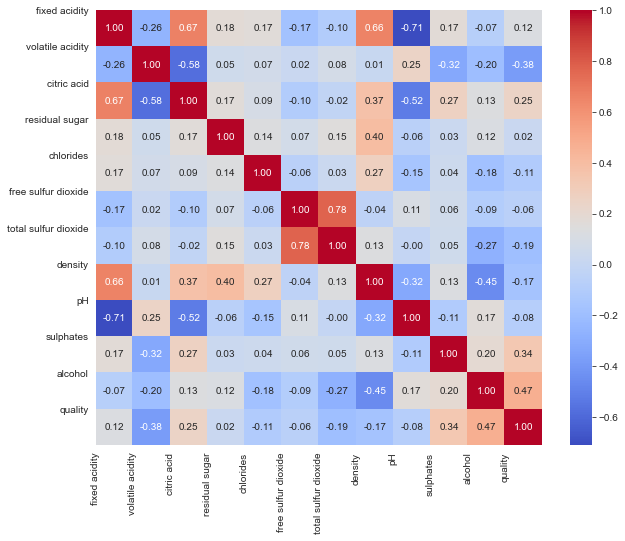

In [231]:
correl = winedata.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(correl, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(correl.columns)), correl.columns);
#Apply yticks
plt.yticks(range(len(correl.columns)), correl.columns)
#show plot
plt.show()

### Model Building


Importing Important Model Libraries

In [232]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt  
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

import collections

In [233]:

bins = (2, 6.5, 8)
labels = [0, 1]
winedata['quality'] = pd.cut(x = winedata['quality'], bins = bins, labels = labels)

In [234]:
winedata['quality'].value_counts()

0    827
1      0
Name: quality, dtype: int64

In [235]:
y = winedata.quality
x = winedata.drop(["quality"], axis = 1)

In [240]:
test_size = 0.20
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = test_size, random_state = 206)
print(X_train, X_test, Y_train, Y_test)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
387        1.151434             0.430         0.34        0.559943      0.080   
1412       1.129330             0.280         0.60        0.615564      0.104   
1048       1.123232             0.310         0.45        0.494302      0.216   
362        1.132286             0.260         0.42        0.473382      0.080   
630        1.200017             0.340         0.45        0.473382      0.082   
...             ...               ...          ...             ...        ...   
458        1.179065             0.645         0.36        0.423877      0.053   
62         1.106811             0.520         0.11        0.322230      0.079   
1188       1.170484             0.370         0.39        0.559943      0.079   
968        1.106811             0.710         0.00        0.360736      0.092   
466        1.189034             0.350         0.53        0.572939      0.070   

      free sulfur dioxide  

In [238]:
winedata["quality"].fillna( 1 , inplace = True)

In [241]:
sm = SMOTE(random_state=14)
X_train_sm, y_train_sm = sm.fit_resample(X_train, Y_train)

In [242]:
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_sm) 
X_test = scaler.transform(X_test) 

In [243]:
results=[]

 #### KNN

Score :  0.7100977198697068
KNeighborsClassifier Acc :  0.7100977198697068


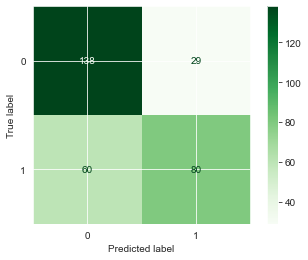

In [244]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train_sm, y_train_sm)
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)

acc = accuracy_score(Y_test, y_pred)
score = knn.score(X_test, Y_test)
results.append(acc)

print("Score : ", score)
print("KNeighborsClassifier Acc : ", acc)

plot_confusion_matrix(knn, X_test, Y_test, cmap= "Greens")  
plt.show()

In [245]:
print(" \t \t  KNN Classification Report")
print(classification_report(Y_test, y_pred))


 	 	  KNN Classification Report
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       167
           1       0.73      0.57      0.64       140

    accuracy                           0.71       307
   macro avg       0.72      0.70      0.70       307
weighted avg       0.71      0.71      0.70       307



#### Gradient Boosting Classifier

Score :  0.7850162866449512
GradientBoostingClassifier Acc :  0.7850162866449512


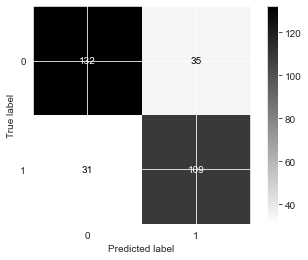

In [246]:
gbc = GradientBoostingClassifier(max_depth= 6, random_state=2)
gbc.fit(X_train_sm, y_train_sm)
y_pred_gbc = gbc.predict(X_test)
cm_aaa = confusion_matrix(Y_test, y_pred_gbc)
acc = accuracy_score(Y_test, y_pred_gbc)
score = gbc.score(X_test, Y_test)
results.append(acc)

print("Score : ", score)
print("GradientBoostingClassifier Acc : ", acc)

plot_confusion_matrix(gbc, X_test, Y_test, cmap= "binary")  
plt.show()

In [247]:
print(" \t \t  GradientBoostingClassifier Classification Report")
print(classification_report(Y_test, y_pred_gbc))

 	 	  GradientBoostingClassifier Classification Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       167
           1       0.76      0.78      0.77       140

    accuracy                           0.79       307
   macro avg       0.78      0.78      0.78       307
weighted avg       0.79      0.79      0.79       307



#### SVC

Score :  0.7361563517915309
SVC Acc :  0.7361563517915309


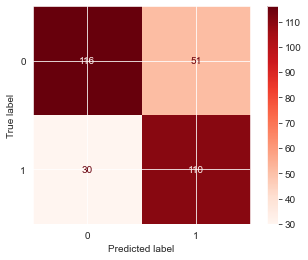

In [248]:
svc = SVC()
svc.fit(X_train_sm, y_train_sm)
pred_svc = svc.predict(X_test)

cm_svc = confusion_matrix(Y_test, pred_svc)
acc = accuracy_score(Y_test, pred_svc)
score = svc.score(X_test, Y_test)
results.append(acc)

print("Score : ", score)
print("SVC Acc : ", acc)

plot_confusion_matrix(svc, X_test, Y_test, cmap= "Reds")  
plt.show()

In [249]:
print(" \t \t  SVC Classification Report")
print(classification_report(Y_test, pred_svc))

 	 	  SVC Classification Report
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       167
           1       0.68      0.79      0.73       140

    accuracy                           0.74       307
   macro avg       0.74      0.74      0.74       307
weighted avg       0.74      0.74      0.74       307



#### XGB Classifier

[22:07:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score :  0.7687296416938111
XGBClassifier Acc :  0.7687296416938111


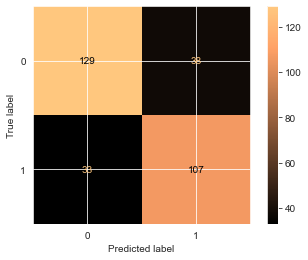

In [250]:
xgb = XGBClassifier()
xgb.fit(X_train_sm, y_train_sm)
pred_xgb = xgb.predict(X_test)

cm_aaa = confusion_matrix(Y_test, pred_xgb)
acc = accuracy_score(Y_test, pred_xgb)
score = xgb.score(X_test, Y_test)
results.append(acc)

print("Score : ", score)
print("XGBClassifier Acc : ", acc)

plot_confusion_matrix(xgb, X_test, Y_test, cmap= "copper")  
plt.show()

In [251]:
print(" \t \t  XGBClassifier Classification Report")
print(classification_report(Y_test, pred_xgb))

 	 	  XGBClassifier Classification Report
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       167
           1       0.74      0.76      0.75       140

    accuracy                           0.77       307
   macro avg       0.77      0.77      0.77       307
weighted avg       0.77      0.77      0.77       307



#### CatBoost Classifier

In [252]:
parameters = {  
                'depth'         : sp_randInt(4, 10),
                'learning_rate' : sp_randFloat(),
                'iterations'    : sp_randInt(10, 100)
             }

Score :  0.7980456026058632
Basic KNN Acc :  0.7980456026058632


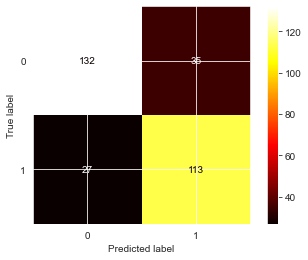

In [253]:
cat = CatBoostClassifier(iterations=1000, verbose = False, depth=8)
randm = RandomizedSearchCV(estimator=cat, param_distributions = parameters, 
                               cv = 2, n_iter = 10, n_jobs=-1)
randm.fit(X_train_sm, y_train_sm)

pred_cat = randm.predict(X_test)

cm_cat = confusion_matrix(Y_test, pred_cat)
acc = accuracy_score(Y_test, pred_cat)
score = randm.score(X_test, Y_test)
results.append(acc)

print("Score : ", score)
print("Basic KNN Acc : ", acc)

plot_confusion_matrix(randm, X_test, Y_test, cmap= "hot")  
plt.show()

In [254]:
print(" \t \t  CatBoostClassifier Classification Report")
print(classification_report(Y_test, pred_cat))

 	 	  CatBoostClassifier Classification Report
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       167
           1       0.76      0.81      0.78       140

    accuracy                           0.80       307
   macro avg       0.80      0.80      0.80       307
weighted avg       0.80      0.80      0.80       307



#### Random Forest Classifier

Score :  0.7947882736156352
RandomForestClassifier Acc :  0.7947882736156352


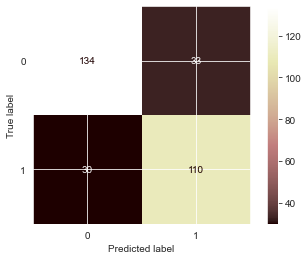

In [255]:
rf = RandomForestClassifier(max_depth=18, random_state=44, bootstrap = False)
rf.fit(X_train_sm, y_train_sm)
y_pred_rf = rf.predict(X_test)
cm = confusion_matrix(Y_test, y_pred_rf)

acc = accuracy_score(Y_test, y_pred_rf)
score = rf.score(X_test, Y_test)
results.append(acc)

print("Score : ", score)
print("RandomForestClassifier Acc : ", acc)

plot_confusion_matrix(rf, X_test, Y_test, cmap= "pink")  
plt.show()

In [256]:
print(" \t \t  RandomForestClassifier Classification Report")
print(classification_report(Y_test, y_pred_rf))

 	 	  RandomForestClassifier Classification Report
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       167
           1       0.77      0.79      0.78       140

    accuracy                           0.79       307
   macro avg       0.79      0.79      0.79       307
weighted avg       0.80      0.79      0.79       307



#### Wrong Predictions 

In [257]:
test_data = pd.DataFrame()
test_data["citric acid"] = winedata["volatile acidity"][:307]
test_data["fixed acidity"] = winedata["fixed acidity"][:307]
test_data["y_pred_rf"] = y_pred_rf
test_data["Y_test"] = Y_test.values


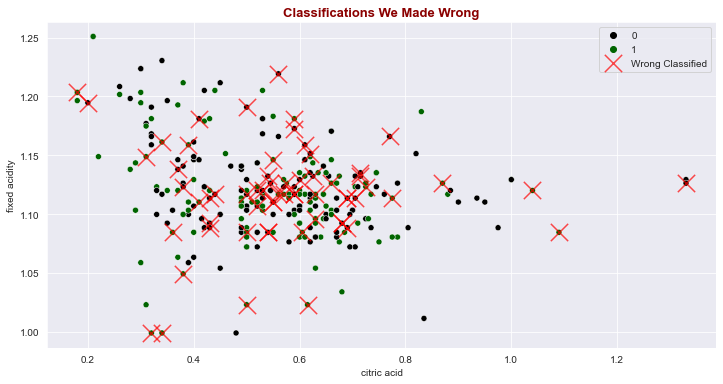

In [258]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="citric acid", y="fixed acidity", hue="Y_test", data=test_data, palette=["Black","darkgreen"])
plt.title("Classifications We Made Wrong", fontsize = 13, fontweight = "bold", color = "darkred")

diff = np.where(y_pred_rf!=Y_test)[0]
plt.scatter(test_data.iloc[diff,0],test_data.iloc[diff,1],label = "Wrong Classified", marker="x",alpha = 0.7, color = "Red",s = 300)
plt.legend()
plt.show()

In [259]:
df_result = pd.DataFrame({"Score":results, "ML Models":["KNN","GradientBoostingClassifier",
             "SVC","XGBClassifier","CatBoostClassifier","RandomForestClassifier"]})

In [260]:
df_result.style.background_gradient("Greens")

,Score,ML Models
0,0.710098,KNN
1,0.785016,GradientBoostingClassifier
2,0.736156,SVC
3,0.768730,XGBClassifier
4,0.798046,CatBoostClassifier
5,0.794788,RandomForestClassifier


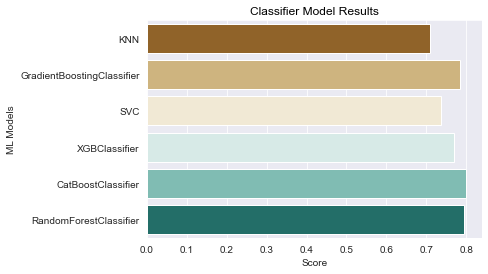

In [261]:
g = sns.barplot("Score", "ML Models", data = df_result, palette='BrBG')
g.set_xlabel("Score")
g.set_title("Classifier Model Results", color = "Black")
plt.show()

In [265]:
#Lets save this model using joblib
#Lets save the above model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(rf, 'redwine_quality.pkl')

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\externals\__init__.py)